In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
df = pd.read_csv('C:\\Users\\ysaru\\Desktop\\Datasets\\loan_prediction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [158]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [160]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']

num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [103]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

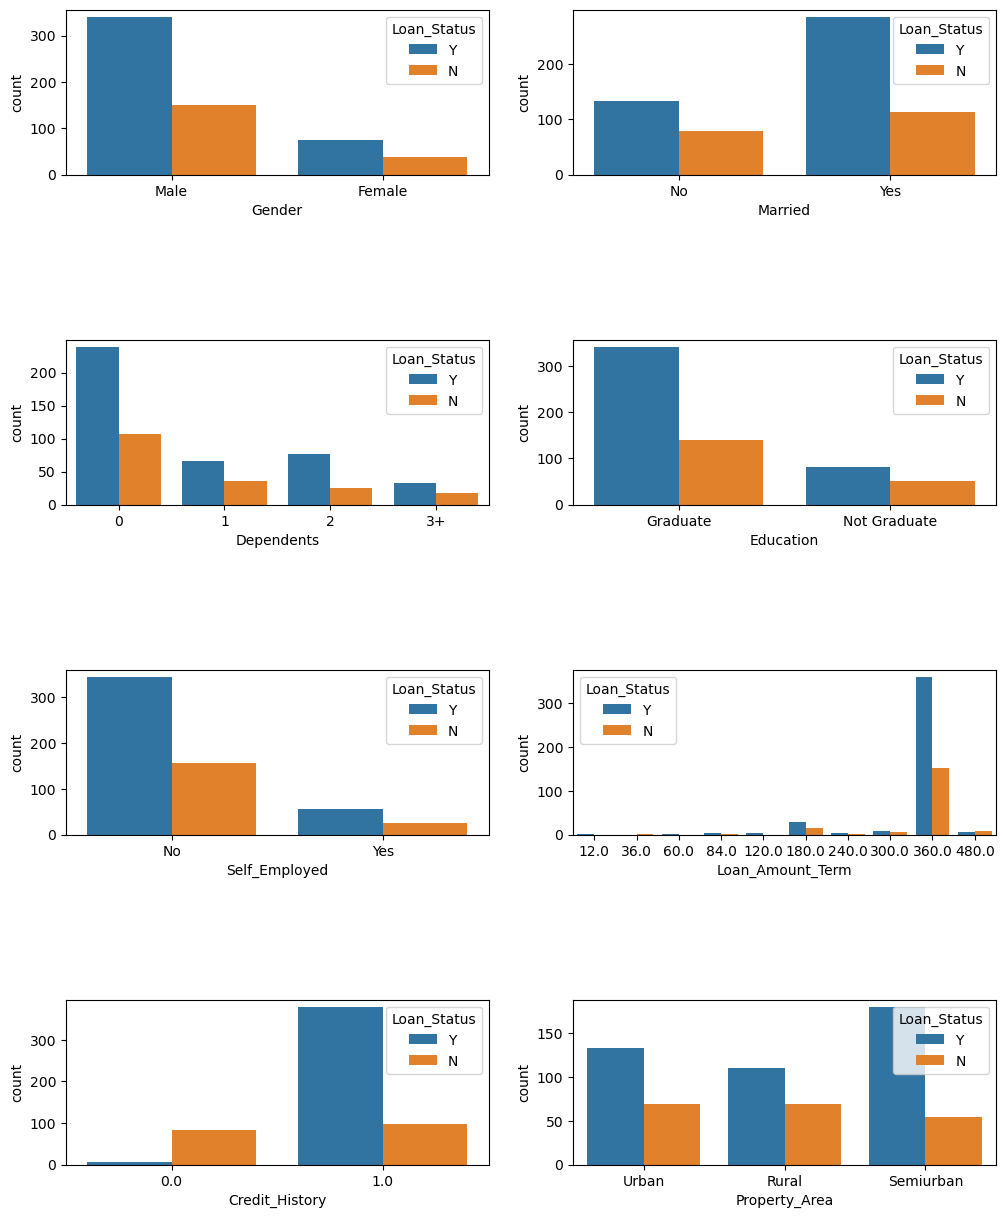

In [104]:
fig, axes = plt.subplots(4, 2, figsize=(12,15))

for idx, cat_col in enumerate(cat_features):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)

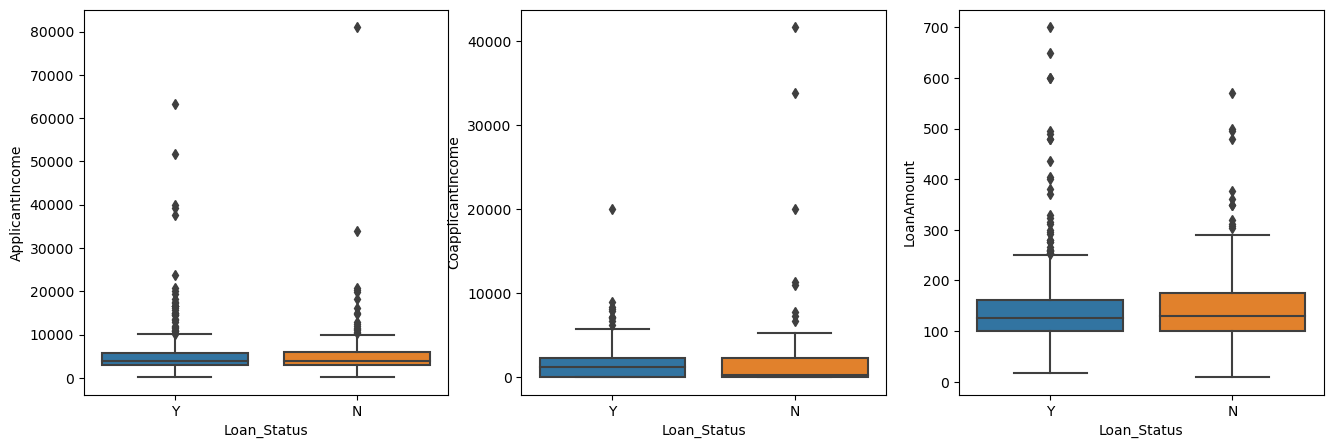

In [105]:
fig, axes = plt.subplots(1,3,figsize=(16,5))

for idx, col in enumerate(num_features):
    sns.boxplot(y=col, data=df, x='Loan_Status', ax=axes[idx])
    


In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [162]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [164]:
X_train.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 17
Loan_Amount_Term           11
Credit_History             37
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_N               0
dtype: int64

In [144]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train_imp = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [147]:
X_train_imp[:,11]

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [117]:
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [119]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

clf_dt.fit(X_train,y_train)
y_pred_dt = clf_dt.predict(X_test_imp)
print(accuracy_score(y_test, y_pred_dt))

0.8162162162162162


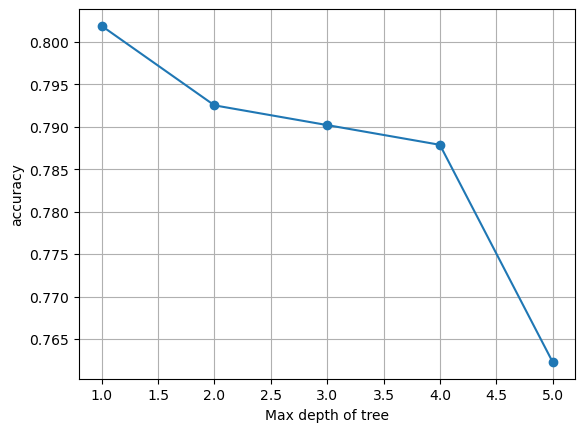

In [134]:
from sklearn.model_selection import cross_val_score

depth = np.arange(1,6,1)
acc_score = []

for i in depth:
    clf1 = DecisionTreeClassifier(criterion='gini', max_depth=i)
    scores = cross_val_score(clf1, X_train_imp, y_train, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(depth, acc_score, marker='o')
plt.xlabel('Max depth of tree')
plt.ylabel('accuracy')
plt.grid()
plt.show()

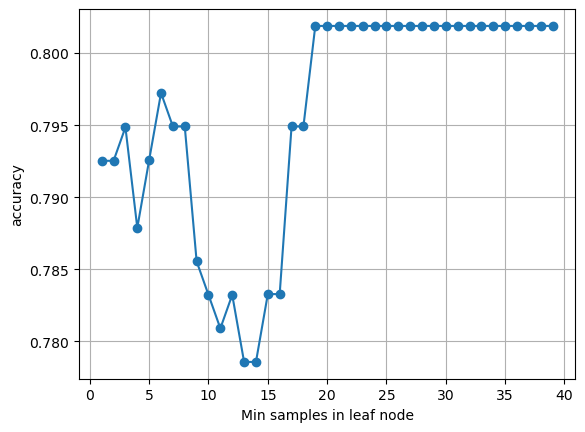

In [136]:
leaf = np.arange(1,40,1)
acc_score = []

for i in leaf:
    clf1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=i)
    scores = cross_val_score(clf1, X_train_imp, y_train, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(leaf, acc_score, marker='o')
plt.xlabel('Min samples in leaf node')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [138]:
from sklearn.metrics import f1_score

clf2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
clf2.fit(X_train_imp,y_train)
y_pred2 = clf2.predict(X_test_imp)
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test, y_pred2))

0.827027027027027
0.8918918918918919
